<a href="https://colab.research.google.com/github/tharushaRukshanRavindra/SDGP/blob/main/MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#removing automatically created ipynb file else it will be in the classes.
!rm -rf `find -type d -name .ipynb_checkpoints`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os


print("Packages imported succsefully")
print("tf version: " + tf. __version__)


Packages imported succsefully
tf version: 2.8.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
print(tf. __version__)
from glob import glob
import pathlib


#Importing keras

from tensorflow import keras
from keras import layers, callbacks, utils, applications, optimizers
from keras.models import Sequential, Model, load_model
import cv2

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

2.8.0
Packages imported...


In [4]:
#giving the path of the data set main data set ps-not to the sub directories
image_path = "/content/drive/MyDrive/MOCK_DATA/"
total_images = len(list(glob(image_path + "*" + "/*.jpg")))
print(total_images)

300


In [5]:
#number of classes in the dataset
num_of_classes = len(list(glob(image_path + "*")))
print(num_of_classes)

5


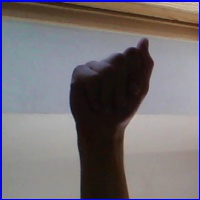

In [6]:
a_path = "/content/drive/MyDrive/MOCK_DATA/A"
A = list(glob(a_path + "/*.jpg"))
PIL.Image.open(str(A[0]))

In [8]:
image_size = 96
train_len = total_images

def get_data(folder):
    X = np.empty((train_len, image_size, image_size, 1), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int_)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):#ignoring the ipynb, checkpoin files.
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 1))
                    img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 1))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(image_path)
print("Images successfully imported")    

Images successfully imported


In [9]:
#checking the shape of the array
print("The shape of arr : ", X_train.shape)
print("The shape of one image is : ", X_train[0].shape)


The shape of arr :  (300, 96, 96, 1)
The shape of one image is :  (96, 96, 1)


In [10]:
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [11]:
X_train.shape

(300, 96, 96, 1)

1


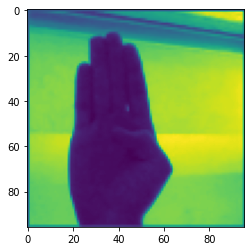

In [25]:
X_train.dtype
plt.imshow(X_train[60][:,:,0])
print(y_train[60])

In [13]:
y_train.shape

(300,)

In [13]:
#batch normalization converting all the values into a number betwween 0 and 1


In [14]:
print(X_train[0])

[[[0.2356141 ]
  [0.22201797]
  [0.21646923]
  ...
  [0.25644064]
  [0.26190767]
  [0.24600354]]

 [[0.2240196 ]
  [0.2268995 ]
  [0.19944853]
  ...
  [0.71147877]
  [0.71164215]
  [0.50257355]]

 [[0.21552287]
  [0.21797386]
  [0.18398012]
  ...
  [0.67937773]
  [0.69191176]
  [0.49781454]]

 ...

 [[0.24686138]
  [0.5502043 ]
  [0.5517974 ]
  ...
  [0.54882896]
  [0.5456291 ]
  [0.41947848]]

 [[0.24836601]
  [0.5485294 ]
  [0.5505515 ]
  ...
  [0.5511234 ]
  [0.5485294 ]
  [0.41109067]]

 [[0.2466231 ]
  [0.41762662]
  [0.41830066]
  ...
  [0.4151961 ]
  [0.41419527]
  [0.32982707]]]


In [15]:
X_data = X_train
y_data = y_train

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,stratify=y_data)

In [17]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_of_classes)
y_cat_test = to_categorical(y_test,num_of_classes)

In [18]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)


(240, 96, 96, 1)
(240,)
(60, 96, 96, 1)
(60,)
(240, 5)
(60, 5)


In [19]:
import gc
del X_data
del y_data
gc.collect()

2231

In [20]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3),  strides=(1, 1),  padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3),  strides=(1, 1),  padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3),  strides=(1, 1),  padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_of_classes)
])


In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
checkpoint_path = "/content/drive/MyDrive/Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [24]:
model.fit(X_train, y_cat_train,
          epochs=5,
          batch_size=10,
          verbose=2,
          validation_data=(X_test, y_cat_test)
         )

Epoch 1/5
24/24 - 2s - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.4472 - val_accuracy: 0.2000 - 2s/epoch - 93ms/step
Epoch 2/5
24/24 - 2s - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.4472 - val_accuracy: 0.2000 - 2s/epoch - 93ms/step
Epoch 3/5
24/24 - 3s - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.4472 - val_accuracy: 0.2000 - 3s/epoch - 131ms/step
Epoch 4/5
24/24 - 4s - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.4472 - val_accuracy: 0.2000 - 4s/epoch - 153ms/step
Epoch 5/5
24/24 - 4s - loss: 6.4472 - accuracy: 0.2000 - val_loss: 6.4472 - val_accuracy: 0.2000 - 4s/epoch - 157ms/step


#### 5.4 Model fitting <a id=15></a>

In [27]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.617972,0.179167,1.609448,0.2
1,1.609936,0.200000,1.609438,0.2
2,1.609545,0.133333,1.609440,0.2
3,1.609581,0.158333,1.609441,0.2
4,1.609573,0.150000,1.609441,0.2


In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.21628424525260925, 0.9666666388511658]

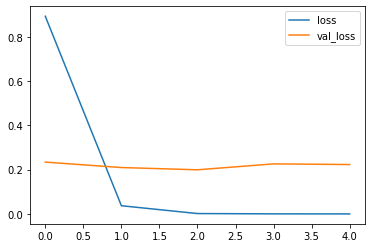

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

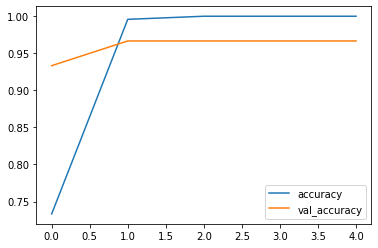

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
predictions = model.predict(X_test)

TypeError: ignored

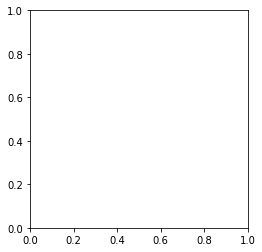